# Sensitivity estimate example

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


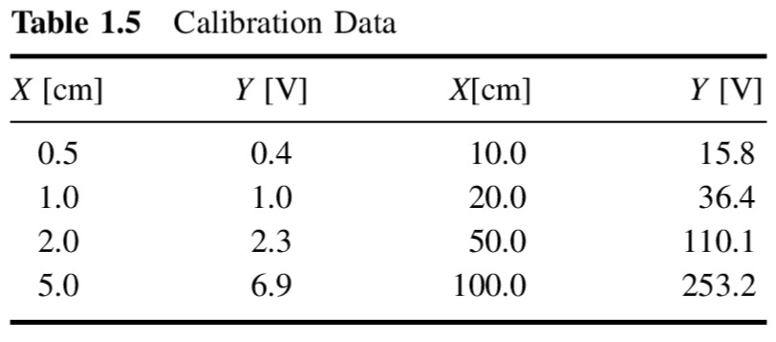

In [1]:
import numpy as np
import matplotlib.pyplot as pl
%pylab inline

import sys
sys.path.append('../scripts')
from linear_regression import linreg

from IPython.core.display import Image 
Image(filename='../img/sensitivity_error_example.png',width=400) 

In [2]:
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2])

Text(0.5, 1.0, 'Calibration curve')

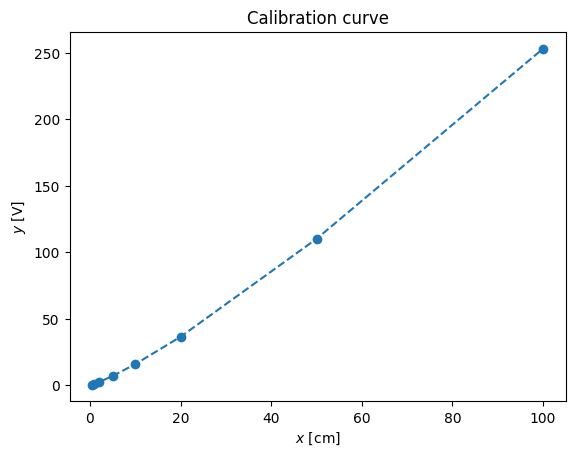

In [3]:
pl.plot(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Calibration curve')

Sensitivity, $K$ is:

$ K_i  = \left( \frac{\partial y}{\partial x} \right)_{x_i} $

In [4]:
K = np.diff(y)/np.diff(x)
print (K)

[1.2        1.3        1.53333333 1.78       2.06       2.45666667
 2.862     ]


Text(0.5, 1.0, 'Sensitivity')

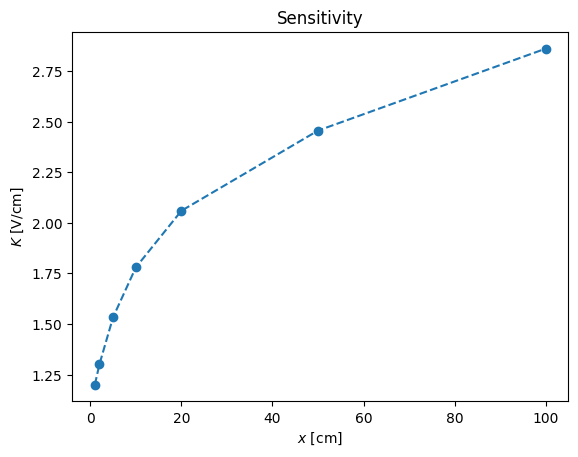

In [5]:
pl.plot(x[1:],K,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Sensitivity')

Instead of working with non-linear curve of sensitivity we can use the usual trick: the logarithmic scale

Text(0.5, 1.0, 'Logarithmic scale')

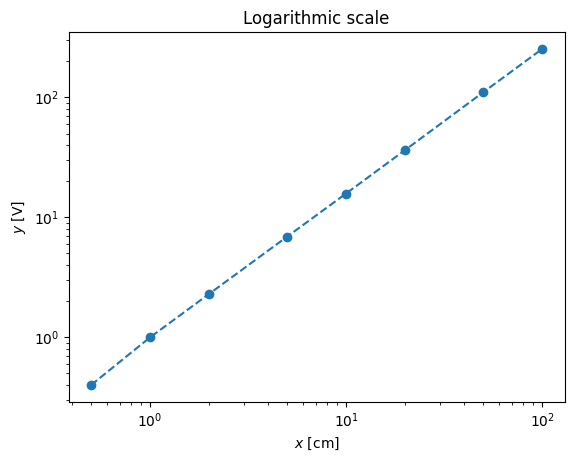

In [6]:
pl.loglog(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')

[1.32192809 1.20163386 1.19897785 1.19525629 1.20401389 1.20793568
 1.20146294]


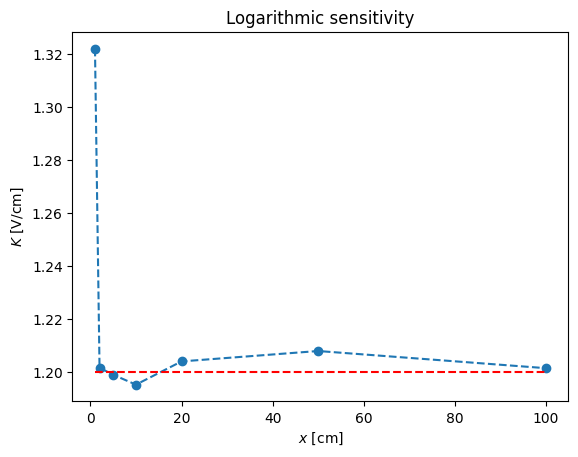

In [7]:
logK = np.diff(np.log10(y))/np.diff(np.log10(x))
print( logK)
pl.plot(x[1:],logK,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Logarithmic sensitivity')
pl.plot([x[1],x[-1]],[1.2,1.2],'r--')

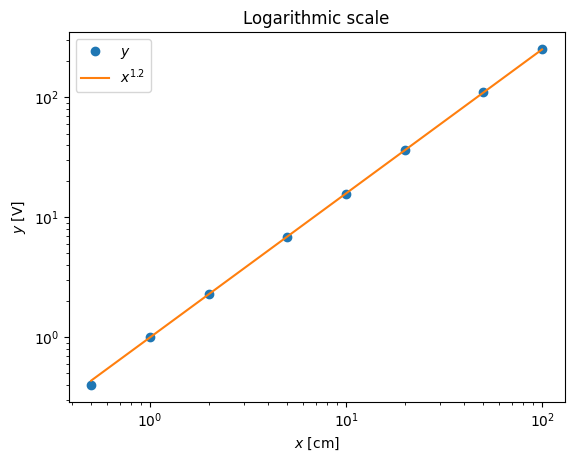

In [8]:
pl.loglog(x,y,'o',x,x**(1.2))
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

Text(0.5, 1.0, 'Deviation plot')

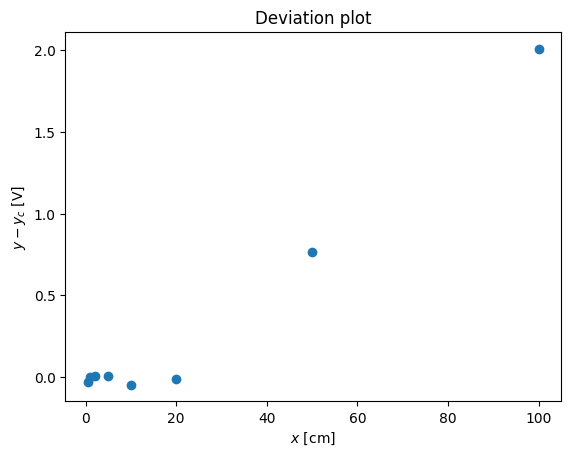

In [9]:
pl.plot(x,y-x**(1.2),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')

## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [10]:
print (linreg(np.log10(x),np.log10(y)))

Estimate: y = ax + b
N = 8
Degrees of freedom $\nu$ = 6 
a = 1.21 $\pm$ 0.005
b = -0.01 $\pm$ 0.005
R^2 = 1.000
Syx = 0.011
y = 1.21 x + -0.01 $\pm$ 0.010 V
(1.2103157469888082, -0.012527809481276199, 0.9998888247342179, 0.011222369359282008)


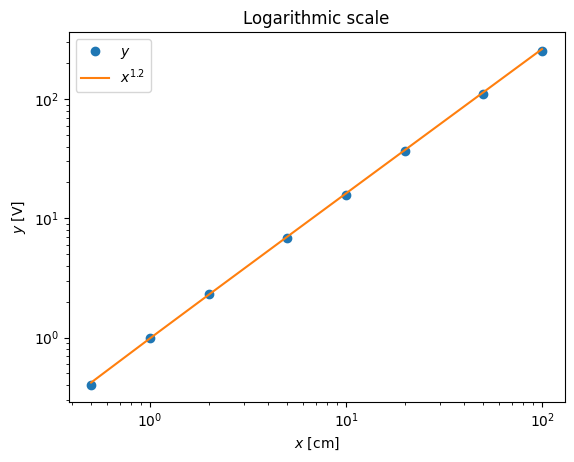

In [11]:
pl.loglog(x,y,'o',x,x**(1.21)-0.01252)
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

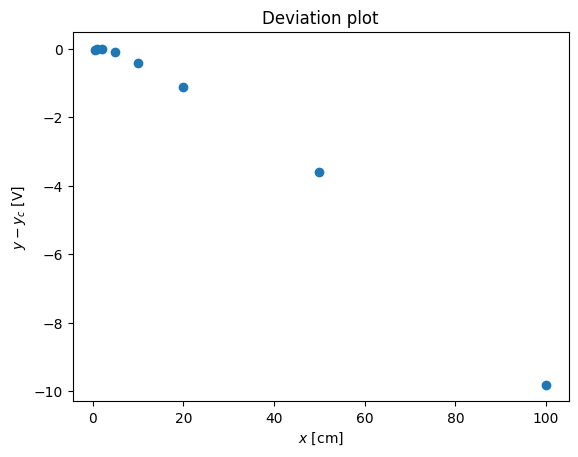

In [12]:
pl.plot(x,y-(x**(1.21)-0.01252),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot');
# pl.legend(('$y$','$x^{1.2}$'),loc='best')